In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import minimize

import electricPotentialEnergy as pe

### Initialize the system

Initial Energy: 218.68564218183548


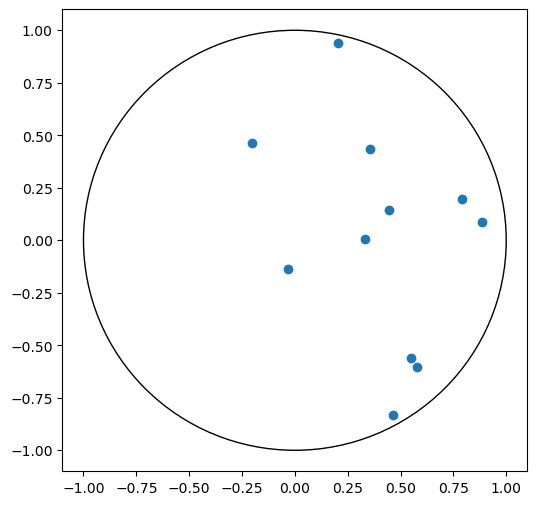

In [2]:
system = pe.Coulomb(11)

fig, ax = pe.plotState(system.state)
print(f"Initial Energy: {system.stateEnergy()}")

### Run Simulated Annealing

In [ ]:
max_iters = 100000
initial_temp = 10
cooling_rate = 0.0001
max_step = 2

filename = "test"


scheme = pe.arithmeticGeometric(initial_temp, cooling_rate, 0)
optimized_system, energy = pe.simulatedAnnealing(system, 10, max_iters, scheme, max_step, save_path=filename)

plt.plot(energy)
print(energy)

fig, ax = pe.plotState(optimized_system.state)
print(f"Final Energy: {optimized_system.stateEnergy()}")
plt.show()

TypeError: arithmeticGeometric() missing 1 required positional argument: 'b'

In [66]:
0/0

ZeroDivisionError: division by zero

In [6]:
optimum = minimize(pe.optimize,x0=[0.25, 0.25], method='Powell', bounds=[[0.1,1], [0.1,1]], options={'disp':True})

Optimization terminated successfully.
         Current function value: 98.018066
         Iterations: 1
         Function evaluations: 32


In [7]:
print(optimum)
print(optimum.x)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 98.01806616991684
       x: [ 5.441e-01  4.434e-01]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 32
[0.54410898 0.44338359]


In [6]:
0/0

ZeroDivisionError: division by zero

### Load simulation results

In [ ]:
saved_states = np.load(f"{filename}.npy")

### Create animation using simulation results

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

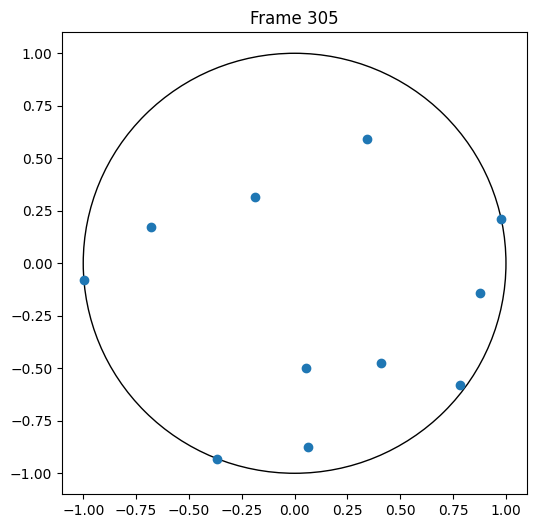

In [ ]:
def update(frame):
    """Update function for the animation."""
    pe.plotState(saved_states[frame], animation=True, ax=ax)
    ax.set_title(f"Frame {frame+1}")

fig, ax = plt.subplots(figsize=(6, 6))
ani = animation.FuncAnimation(fig, update, frames=len(saved_states), interval=200)

ani.save(f"{filename}.mp4", fps=50)